### Autoencoder  Neural Network
- Unsupervised learning algorithm that applies backpropagation, setting the target values to be equal to the inputs

In [1]:
# Imports
import numpy as np
import tensorflow as tf

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

/Applications/anaconda/envs/tensorflow/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# MNIST data
import tensorflow.examples.tutorials.mnist.input_data as data
mnist = data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
# Autoencoder 
def autoencoder(dimensions=[784, 512, 256, 128]):
    """
    Deep Autoencoder
    Arguments:
        dimensions: list of number of neurons for each layer
    output:
        x: Tensor (input to network)
        z: Tensor (inner most latent representation)
        y: Tensor (output reconstruction of input)
        cost: Tensor (Training cost)
    """
    # Input placeholder
    x = tf.placeholder(tf.float32, shape=[None, dimensions[0]], name='x')
    current_input = x
    
    # Encoder
    encoder = []
    for layer_i, n_output in enumerate(dimensions[1:]):
        n_input = int(current_input.get_shape()[1]) # Shape: 2D
        W = tf.Variable(tf.random_normal([n_input, n_output]))
        b = tf.Variable(tf.zeros([n_output]))
        encoder.append(W)
        linear = tf.add(tf.matmul(current_input, W), b)
        activation = tf.nn.tanh(linear)
        current_input = activation
        
    # Latent representation
    z = current_input
    
    # Reverse the Weight list
    encoder.reverse()
    
    # Decoder
    for layer_i, n_output in enumerate(dimensions[:-1][::-1]):
        # Transpose Tensor for multiplication
        W = tf.transpose(encoder[layer_i])
        b = tf.Variable(tf.zeros([n_output]))
        linear = tf.add(tf.matmul(current_input, W), b)
        activation = tf.nn.tanh(linear)
        current_input = activation
        
    # Reconstruction of input through network
    y = current_input
    
    # Cost: pixel wise difference
    #cost = tf.reduce_sum(tf.square(y - x))
    
    # Cost: Squared error
    cost = tf.reduce_mean(tf.pow(y - x, 2))
    
    return {'x': x, 'z': z, 'y': y, 'cost': cost}

In [4]:
# Prepare data
mean_img = np.mean(mnist.train.images, axis=0)

In [5]:
# Training
ae = autoencoder(dimensions=[784, 512, 256])
l_rate = 0.001
optimizer = tf.train.AdamOptimizer(learning_rate=l_rate).minimize(ae['cost'])

# Create session
sess = tf.Session()
sess.run(tf.initialize_all_variables())

batch_size = 100
n_epochs = 20
batches = mnist.train.num_examples // batch_size
for epoch in range(n_epochs):
    for batch in range(batches):
        batch_x, _ = mnist.train.next_batch(batch_size)
        train_x = np.array([img - mean_img for img in batch_x])
        sess.run(optimizer, feed_dict={ae['x']: train_x})
    cost = sess.run(ae['cost'], feed_dict={ae['x']: train_x})
    print 'Epoch-{} Cost: {}'.format(epoch, cost)

Epoch-0 Cost: 0.906757831573
Epoch-1 Cost: 0.898342013359
Epoch-2 Cost: 0.890533208847
Epoch-3 Cost: 0.882822692394
Epoch-4 Cost: 0.879105269909
Epoch-5 Cost: 0.875094652176
Epoch-6 Cost: 0.865180790424
Epoch-7 Cost: 0.859171509743
Epoch-8 Cost: 0.860987246037
Epoch-9 Cost: 0.854545176029
Epoch-10 Cost: 0.850464344025
Epoch-11 Cost: 0.848194777966
Epoch-12 Cost: 0.842719137669
Epoch-13 Cost: 0.837379038334
Epoch-14 Cost: 0.836326122284
Epoch-15 Cost: 0.832591295242
Epoch-16 Cost: 0.8352252841
Epoch-17 Cost: 0.831806123257
Epoch-18 Cost: 0.828009486198
Epoch-19 Cost: 0.828643918037


####  Plot reconstructions

In [25]:
# Reconstruction
n_examples = 10
test_x, _ = mnist.test.next_batch(n_examples)
test_x_norm = np.array([img - mean_img for img in test_x])
x_hat = sess.run(ae['y'], feed_dict={ae['x']: test_x_norm})

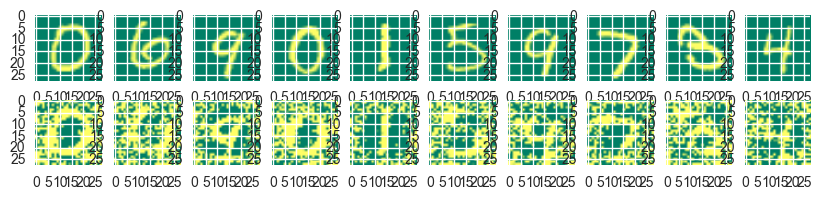

In [26]:
# Without adding mean image
fig, ax = plt.subplots(2, n_examples, figsize=(10, 2))
for example in range(n_examples):
    ori = np.reshape(test_x[example, :], (28, 28))
    rec = np.reshape(x_hat[example, :], (28, 28))
    ax[0][example].imshow(ori, cmap='summer')
    ax[1][example].imshow(rec, cmap='summer')
fig.show()

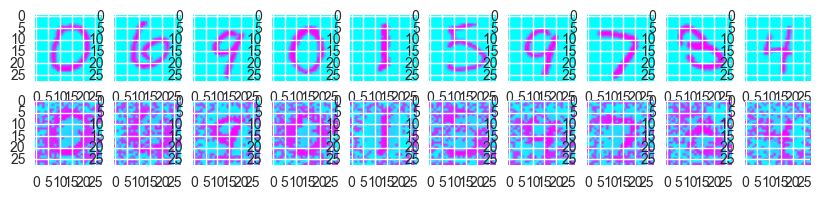

In [27]:
# Adding mean image
fig, ax = plt.subplots(2, n_examples, figsize=(10, 2))
for example in range(n_examples):
    ori = np.reshape(test_x[example, :], (28, 28))
    rec = np.reshape([x_hat[example, :] + mean_img], (28, 28))
    ax[0][example].imshow(ori, cmap='cool')
    ax[1][example].imshow(rec, cmap='cool')
fig.show()

####  Clever Tricks

In [9]:
dimensions=[784, 512, 256, 64]
print 'All: ', dimensions
print 'All but first: ', dimensions[1:]
print 'All but last: ', dimensions[:-1]
print 'All but last (reverse): ', dimensions[:-1][::-1] 

All:  [784, 512, 256, 64]
All but first:  [512, 256, 64]
All but last:  [784, 512, 256]
All but last (reverse):  [256, 512, 784]


In [10]:
# Clever Trick
dimensions=[1, 2, 3, 4, 5]
encoder = []
for i, j in enumerate(dimensions[1:]):
    encoder.append(j)
    print 'i: {} and j: {}'.format(i, j)
print encoder
encoder.reverse()
print encoder
for i, j in enumerate(dimensions[:-1][::-1]):
    print 'i: {} and j: {}'.format(i, j)

i: 0 and j: 2
i: 1 and j: 3
i: 2 and j: 4
i: 3 and j: 5
[2, 3, 4, 5]
[5, 4, 3, 2]
i: 0 and j: 4
i: 1 and j: 3
i: 2 and j: 2
i: 3 and j: 1


In [11]:
help(tf.reduce_sum)

Help on function reduce_sum in module tensorflow.python.ops.math_ops:

reduce_sum(input_tensor, reduction_indices=None, keep_dims=False, name=None)
    Computes the sum of elements across dimensions of a tensor.
    
    Reduces `input_tensor` along the dimensions given in `reduction_indices`.
    Unless `keep_dims` is true, the rank of the tensor is reduced by 1 for each
    entry in `reduction_indices`. If `keep_dims` is true, the reduced dimensions
    are retained with length 1.
    
    If `reduction_indices` has no entries, all dimensions are reduced, and a
    tensor with a single element is returned.
    
    For example:
    
    ```python
    # 'x' is [[1, 1, 1]
    #         [1, 1, 1]]
    tf.reduce_sum(x) ==> 6
    tf.reduce_sum(x, 0) ==> [2, 2, 2]
    tf.reduce_sum(x, 1) ==> [3, 3]
    tf.reduce_sum(x, 1, keep_dims=True) ==> [[3], [3]]
    tf.reduce_sum(x, [0, 1]) ==> 6
    ```
    
    Args:
      input_tensor: The tensor to reduce. Should have numeric type.
      reducti